In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Comparison

In [ ]:
x = 3
y = 4
x > y

In [ ]:
x < y

In [ ]:
type(x < y)

In [ ]:
y <= y

In [ ]:
x > 2

In [ ]:
x == 3

In [ ]:
5 == 10/2

In [ ]:
5 = 10/2

In [ ]:
5 = 'hello'

In [ ]:
y != 10/2

In [ ]:
x < 3.5 < y

In [ ]:
min(x, y) <= (x+y)/2 <= max(x, y)

In [2]:
'Dog' > 'Cat'

True

In [ ]:
'Canine' > 'Feline'

In [ ]:
'Dog' > 'Catastrophe' > 'Cat'

In [ ]:
a = np.arange(11, 50)
a

In [ ]:
a > 30

In [ ]:
a <= 15

This doesn't work :(. So you'll have to use a Table

In [ ]:
13 <= a <= 19

In [ ]:
def teen(x):
    return 13 <= x <= 19

In [ ]:
teen(10)

In [ ]:
teen(15)

In [ ]:
teen(20)

In [ ]:
ages.apply(teen, 'Age')

In [ ]:
ages = Table().with_column('Age', a)
ages.with_column('Teenager', ages.apply(teen, 'Age'))

Introduce or/and/not in slides

In [ ]:
x

In [ ]:
y

In [ ]:
x < 2 or y > 4

In [ ]:
not (x < 2 or x > 4)

In [ ]:
a > 12 and a < 20

## Predicates

In [ ]:
ages

In [ ]:
still_young = are.between(35, 40)
ages.where('Age', still_young)

In [ ]:
still_young(38)

In [ ]:
still_young(40)

In [ ]:
ages.apply(still_young, 'Age')

Discussion question: What does this do?

In [ ]:
ages.where('Age', teen)

## Choice

In [3]:
two_groups = make_array('treatment', 'control')
np.random.choice(two_groups)

'treatment'

In [4]:
np.random.choice(two_groups, 10)

array(['treatment', 'control', 'control', 'control', 'control',
       'treatment', 'control', 'treatment', 'control', 'treatment'],
      dtype='<U9')

In [5]:
np.random.choice(two_groups, 10)

array(['control', 'control', 'control', 'control', 'control', 'control',
       'control', 'treatment', 'control', 'treatment'], dtype='<U9')

In [6]:
outcomes = np.random.choice(two_groups, 10)
outcomes

array(['control', 'treatment', 'control', 'treatment', 'treatment',
       'treatment', 'treatment', 'treatment', 'control', 'treatment'],
      dtype='<U9')

In [7]:
outcomes

array(['control', 'treatment', 'control', 'treatment', 'treatment',
       'treatment', 'treatment', 'treatment', 'control', 'treatment'],
      dtype='<U9')

In [8]:
outcomes == 'control'

array([ True, False,  True, False, False, False, False, False,  True,
       False])

In [9]:
np.count_nonzero(outcomes)

10

In [10]:
np.count_nonzero(outcomes == 'control')

3

In [11]:
np.count_nonzero(outcomes == 'treatment')

7

## Discussion Question

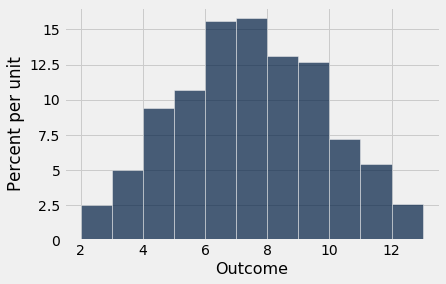

In [12]:
outcomes = np.random.choice(np.arange(6)+1, 1000) + np.random.choice(np.arange(6)+1, 1000)
Table().with_column("Outcome", outcomes).hist('Outcome', bins=np.arange(2, 14))

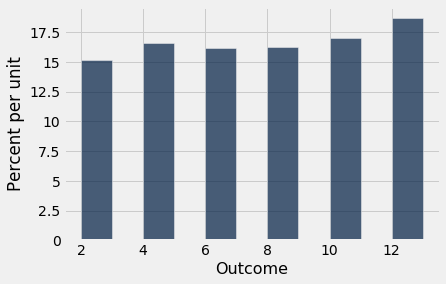

In [13]:
outcomes = 2 * np.random.choice(np.arange(6)+1, 1000)
Table().with_column("Outcome", outcomes).hist('Outcome', bins=np.arange(2, 14))

## Conditional Statements

In [ ]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 0:
        print('positive')
    if x < 0:
        print('negative')
    if x == 0:
        print('zero')

sign(3)
sign(-3)
sign(0)

Explain why this happens

In [ ]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 0:
        print('positive')
    if x < 0:
        print('negative')
    else:
        print('zero')

sign(3)
sign(-3)
sign(0)

In [ ]:
def sign(x):
    print(x, 'is', end=' ')
    if x > 1e-15:
        print('positive')
    elif x < -1e-15:
        print('negative')
    elif x == 0:
        print('zero')
    else:
        print('really close to zero')

sign(3)
sign(-3)
sign(0)
sign(2**0.5 * 2 **0.5 - 2)

## For Statements

In [ ]:
np.append(make_array(1, 2, 3), 4)

In [ ]:
np.append(make_array(1, 2, 3), 'four')

In [2]:
np.append(make_array(1, 2, 3), make_array(4, 5, 6))

array([1, 2, 3, 4, 5, 6])

In [3]:
np.arange(4)

array([0, 1, 2, 3])

In [4]:
for i in np.arange(4):
    print('iteration', i)

iteration 0
iteration 1
iteration 2
iteration 3


In [5]:
coin = make_array('heads', 'tails')
np.random.choice(coin, 5)

array(['tails', 'tails', 'heads', 'tails', 'heads'], dtype='<U5')

In [6]:
np.count_nonzero(np.random.choice(coin, 100) == 'heads')

55

In [8]:
num_heads = make_array()

np.append doesn't change the original array

In [9]:
np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([], dtype=float64)

In [11]:
num_heads = np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([55., 58.])

In [12]:
for i in np.arange(10000):
    num_heads = np.append(num_heads, np.count_nonzero(np.random.choice(coin, 100) == 'heads'))
num_heads

array([55., 58., 50., ..., 56., 43., 49.])

In [ ]:
len(num_heads)

Discussion question: What do you think the plot will look like? What do think the minimum number of heads will be? The maximum?

In [ ]:
t = Table().with_column('Heads in 100 coin flips', num_heads)
t.hist(bins=np.arange(30, 70, 1))

In [ ]:
t.column(0).min()

In [ ]:
t.column(0).max()

## Monty Hall

In [2]:
doors = make_array(1, 2, 3)
doors

array([1, 2, 3])

In [3]:
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [4]:
np.random.choice(prizes, 3, replace=False)

array(['car', 'second goat', 'first goat'], dtype='<U11')

### Stepts:
1. Put prizes behind doors randomly
2. I pick a door
3. Monty opens a door
4. Reveal what was behind each door

### Step 1: Set up game

In [5]:
def setup():
    """Return a random game of Let's Make a Deal."""
    return Table().with_columns(
        'Door', doors,
        'Prize', np.random.choice(prizes, 3, replace=False)
    )

a_game = setup()
a_game

Door,Prize
1,first goat
2,car
3,second goat


### Step 2: Pick a door

In [6]:
a_guess = np.random.choice(doors)
a_guess

1

### Step 3: Monty opens a door

**How would you define a function `behind` that takes in a game and a door number and prints out something like:**

`Behind door number 1 is the second goat`

In [7]:
def behind(game, door):
    """Return the prize behind a door."""
    return game.where('Door', door).column('Prize').item(0)

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the first goat
Behind door number 2 is the car
Behind door number 3 is the second goat


In [8]:
def location(game, prize):
    """Return the door that hides a prize."""
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 2
The first goat is behind door number 1
The second goat is behind door number 3


**How would you write a function `expose` that takes in a game and a guessed door number and shows which door Monty Hall would open to expose a goat?**

In [9]:
def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = np.random.choice(['first goat', 'second goat'])
    return location(game, reveal)

an_exposed_door = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', an_exposed_door, 'to expose the', behind(a_game, an_exposed_door))

The contestant picked door 1 which hides the first goat
Monty Hall opens door 3 to expose the second goat


In [10]:
def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return (1 + 2 + 3) - guess - exposed

the_remaining_door = other(a_game, a_guess, an_exposed_door)
print('The remaining door', the_remaining_door, 'hides the', behind(a_game, the_remaining_door))

The remaining door 2 hides the car


### Step 4: See what happened, Repeat

####  Let's simulate one game of the Monty Hall Problem. Create a list where the first element is the prize behind the first guess, the second is the prize behind Monty's exposed door, and the third is the prize behind the remaining door.

### we have following functions:
1. `setup`: puts the prize randomely behind the doors
2. `expose`: returns the door that Monty Hall opens to expose a goat. 
3. `other`: returns the door that is not the guess or the exposed. 
4. `behind`: returns the prize behind a door. 

In [11]:
game = setup()
guess = np.random.choice(doors)
exposed = expose(game, guess)
remaining = other(game, guess, exposed)
[guess, exposed, remaining]
#[behind(game, guess), behind(game, exposed), behind(game, remaining)]

[2, 3, 1]

In [12]:
game

Door,Prize
1,car
2,first goat
3,second goat


In [13]:
trials = Table(['trial', 'guess', 'exposed', 'remaining'])
for i in np.arange(10000)+1:
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])
    
trials

trial,guess,exposed,remaining
1,second goat,first goat,car
2,second goat,first goat,car
3,car,first goat,second goat
4,second goat,first goat,car
5,first goat,second goat,car
6,second goat,first goat,car
7,first goat,second goat,car
8,second goat,first goat,car
9,second goat,first goat,car
10,car,first goat,second goat


In [14]:
trials.group('guess')

guess,count
car,3284
first goat,3405
second goat,3311


In [15]:
trials.group('remaining')

remaining,count
car,6716
first goat,1618
second goat,1666


(0, 6000)

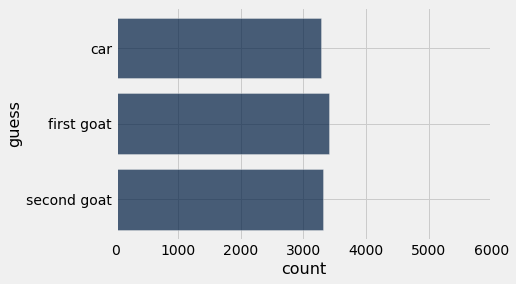

In [16]:
trials.group('guess').barh('guess')
plots.xlim(0, 6000)

(0, 6000)

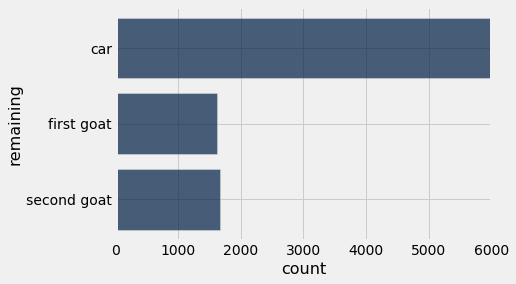

In [17]:
trials.group('remaining').barh('remaining')
plots.xlim(0, 6000)

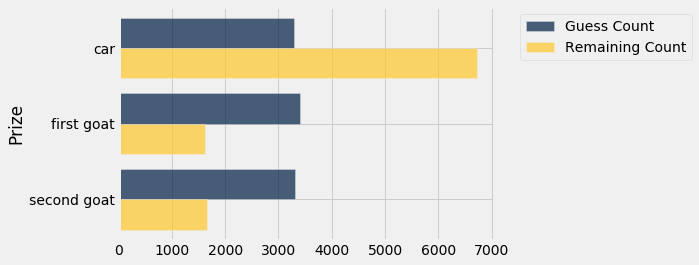

In [18]:
compare = trials.group('guess').join('guess', trials.group('remaining'), 'remaining')
compare.relabeled(0, 'Prize').relabeled(1, 'Guess Count').relabeled(2, 'Remaining Count').barh(0)

## Probability

#### Tickets

Red Green Blue

What's the chance of GR when sampling two cards without replacement

RB 

RG 

BR 

BG 

GR 

GB

P(GR) = 1/6

P(one R and one G) = P(GR) + P(RG) = 1/6 + 1/6

## Sampling

In [19]:
top = Table.read_table('top_movies_2017.csv')
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
top

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
5,The Ten Commandments,Paramount,65500000,1164590000,1956
6,Jaws,Universal,260000000,1138620700,1975
7,Doctor Zhivago,MGM,111721910,1103564200,1965
8,The Exorcist,Warner Brothers,232906145,983226600,1973
9,Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [20]:
top.take([3, 5, 7])

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
5,The Ten Commandments,Paramount,65500000,1164590000,1956
7,Doctor Zhivago,MGM,111721910,1103564200,1965


In [21]:
top.where('Title', are.containing('and the'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
9,Snow White and the Seven Dwarves,Disney,184925486,969010000,1937
35,Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969
70,Smokey and the Bandit,Universal,126737428,505244700,1977
71,Beauty and the Beast (2017),Buena Vista,504014165,504014165,2017
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,317575550,497066400,2001
75,Lady and the Tramp,Disney,93602326,495483100,1955
91,Indiana Jones and the Temple of Doom,Paramount,179870271,475906700,1984
105,Indiana Jones and the Last Crusade,Paramount,197171806,439312600,1989
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,381011219,426630300,2011
129,Beauty and the Beast,Buena Vista,218967620,403283400,1991


#### Deterministic or probability?

In [22]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, 200, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
4,Titanic,Paramount,658672302,1204368000,1997
14,Avatar,Fox,760507625,865082100,2009
24,The Godfather,Paramount,134966411,701621600,1972
34,Shrek 2,Dreamworks,441226247,631642700,2004
44,Airport,Universal,100489151,587729300,1970
54,Finding Nemo,Buena Vista,380843261,547504100,2003
64,Back to the Future,Universal,210609762,524960300,1985
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,317575550,497066400,2001
84,Men in Black,Sony,250690539,485542200,1997
94,Mrs. Doubtfire,Fox,219195243,468364200,1993


In [25]:
top.sample(500)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
107,Frozen,Buena Vista,400738009,435974700,2013
71,Beauty and the Beast (2017),Buena Vista,504014165,504014165,2017
142,Dances with Wolves,Orion,184208848,388486700,1990
174,Austin Powers: The Spy Who Shagged Me,Newline,206040086,360570200,1999
123,The Four Horsemen of the Apocalypse,Metro,9183673,408214300,1921
152,Psycho,Universal,32000000,379306800,1960
117,Shrek the Third,Paramount/Dreamworks,322719944,417002900,2007
1,Star Wars,Fox,460998007,1583483200,1977
190,Batman Returns,Warner Brothers,162831698,348813000,1992
21,The Graduate,AVCO,104945305,760778000,1967


In [26]:
top.sample(500, with_replacement=False)

ValueError: Cannot take a larger sample than population when 'replace=False'

## Dice

In [27]:
die = Table().with_column('face', np.arange(6)+1)
die

face
1
2
3
4
5
6


In [33]:
die.sample(1)

face
4


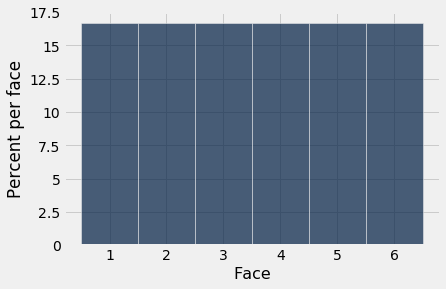

In [34]:
def face_hist(t):
    t.hist('face', bins=np.arange(0.5, 7, 1), unit='face')
    plots.xlabel('Face')
    
face_hist(die)

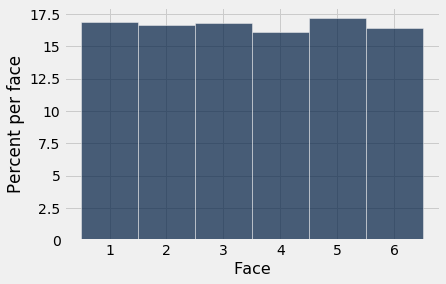

In [38]:
face_hist(die.sample(10000))

## Flights

In [39]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


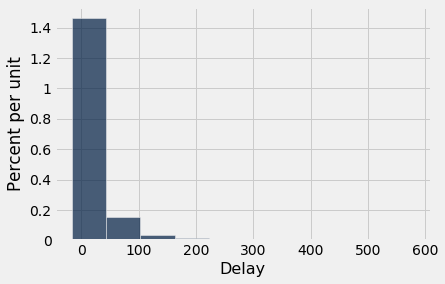

In [40]:
united.hist('Delay')

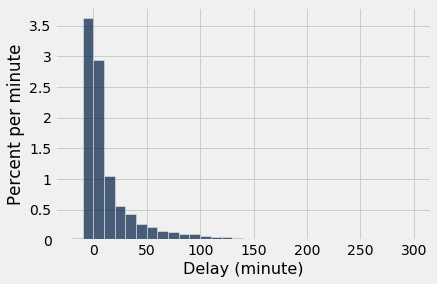

In [41]:
united.hist('Delay', bins=np.arange(-20, 301, 10), unit='minute')

Discussion question: What proportion of flights were between 10 and 20 mins late?

In [42]:
united.where('Delay', are.between(10, 20)).num_rows / united.num_rows

0.10452079566003616

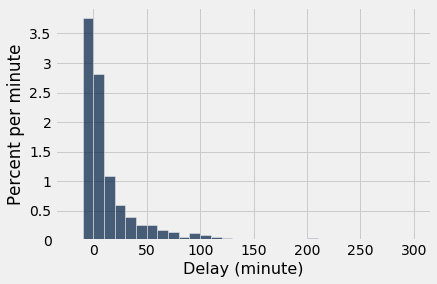

In [45]:
united.sample(1000).hist('Delay', bins=np.arange(-20, 301, 10), unit='minute')

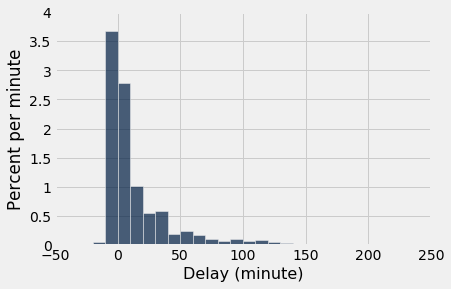

In [47]:
def united_sample_hist(n):
    united.sample(n).hist('Delay', bins=np.arange(-20, 301, 10), unit='minute')
    plots.xlim(-50, 250)
    plots.ylim(0, 0.04)
    plots.show()
    
united_sample_hist(1000)

In [48]:
_ = interact(united_sample_hist, n=widgets.ToggleButtons(options=[10, 100, 1000, 10000]))

interactive(children=(ToggleButtons(description='n', options=(10, 100, 1000, 10000), value=10), Output()), _do…